In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup = pd.read_csv("D:/Data Science-ExcelR/Assignments/Linear Regression/Multi Linear Regression/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


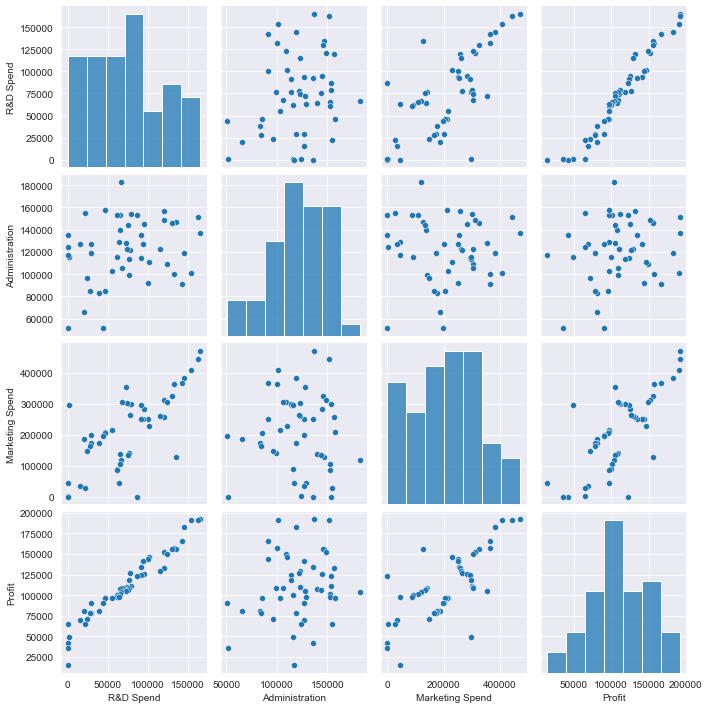

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

{'whiskers': [<matplotlib.lines.Line2D at 0x28088ba24c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28088ba2f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28088ba2220>],
 'medians': [<matplotlib.lines.Line2D at 0x28088e73220>],
 'fliers': [<matplotlib.lines.Line2D at 0x28088e73550>],
 'means': []}

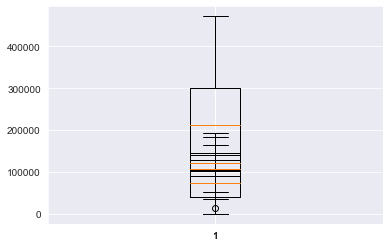

In [10]:
plt.boxplot(startup["Profit"])
plt.boxplot(startup["R&D Spend"])
plt.boxplot(startup["Administration"])
plt.boxplot(startup["Marketing Spend"])

In [11]:
Startup= pd.get_dummies(startup['State'])

In [12]:
startup= pd.concat([startup,Startup],axis=1)

In [13]:
startup= startup.drop(["State"],axis=1)

In [14]:
startup= startup.iloc[:,[3,0,1,2,4,5,6]]

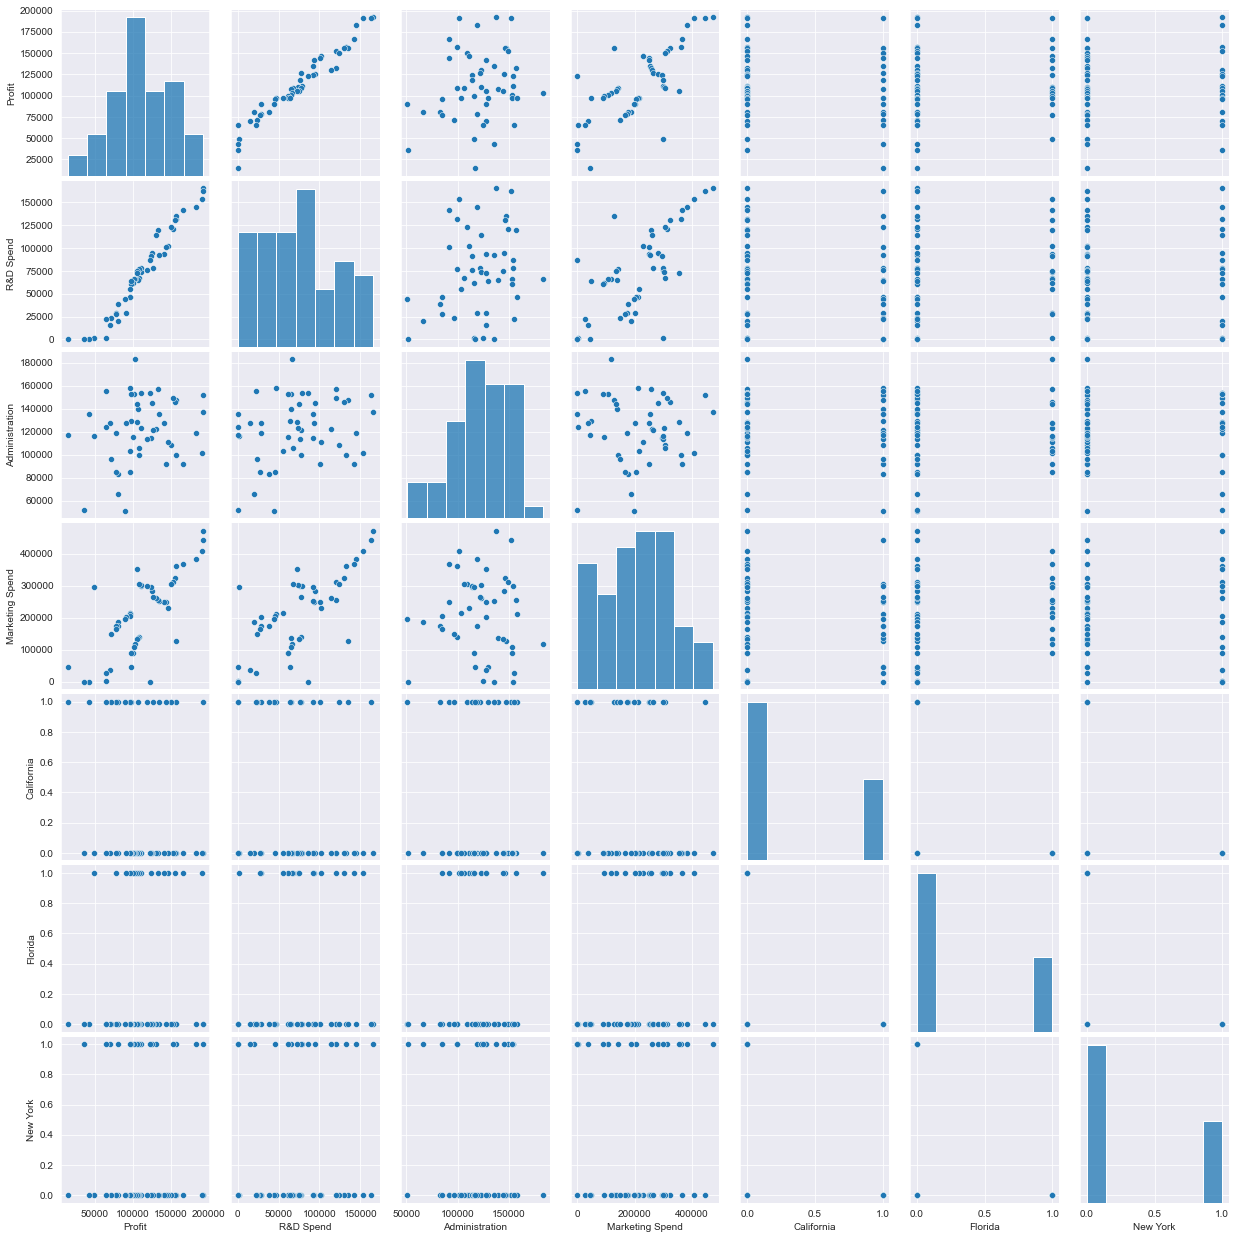

In [16]:
sns.pairplot(startup)
cor_values= startup.corr()

In [17]:
from sklearn.model_selection import train_test_split

train_data,test_data= train_test_split(startup)

In [18]:
startup.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
train_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
test_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

C:\Users\Sures\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
train_data.to_csv("train_data.csv",encoding="utf-8")
test_data.to_csv("test_data.csv",encoding="utf-8")

In [20]:
model1= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork",data=train_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.99e-18
Time:                        11:56:58   Log-Likelihood:                -389.75
No. Observations:                  37   AIC:                             791.5
Df Residuals:                      31   BIC:                             801.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.415e+04   7341.493      6.013      0.000    2.92e+04    5.91e+04
RnD                0.8316      0.053     15.579      0.000       0.723       0.940
Administration    -0.0962      0.072     -1.344      0.189      -0.242       0.050
Marketing          0.0155      0.021      0.736      0.467      -0.027       0.058
California      1.392e+04   3302.694      4.216      0.000    7188.416    2.07e+04
Florida         1.547e+04   3532.447      4.381      0.000    8269.810    2.27e+04
NewYork         1.475e+04   3395.258      4.344      0.000    7824.112    2.17e+04
==============================================================================
Omnibus:                       15.837   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.829
Skew:                          -1.208   Prob(JB):                     3.00e-05
Kurtosis:                       5.771   Cond. No.                     1.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
model1_ad= smf.ols("Profit~Administration", data= train_data).fit()
model1_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.4660
Date:                Sun, 04 Apr 2021   Prob (F-statistic):              0.499
Time:                        11:57:54   Log-Likelihood:                -442.76
No. Observations:                  37   AIC:                             889.5
Df Residuals:                      35   BIC:                             892.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.377e+04   3.16e+04      2.970      0.005    2.97e+04    1.58e+05
Administration     0.1713      0.251      0.683      0.499      -0.338       0.681
==============================================================================
Omnibus:                        0.614   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.086
Skew:                           0.044   Prob(JB):                        0.958
Kurtosis:                       3.219   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model1_ma = smf.ols("Profit~Marketing", data= train_data).fit()
model1_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     27.46
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           7.74e-06
Time:                        11:58:27   Log-Likelihood:                -432.29
No. Observations:                  37   AIC:                             868.6
Df Residuals:                      35   BIC:                             871.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.497e+04   1.07e+04      6.081      0.000    4.33e+04    8.67e+04
Marketing      0.2234      0.043      5.241      0.000       0.137       0.310
==============================================================================
Omnibus:                        3.005   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.786
Skew:                          -0.395   Prob(JB):                        0.410
Kurtosis:                       3.730   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model1_com= smf.ols("Profit~Administration+Marketing", data= train_data).fit()
model1_com.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     17.01
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           7.61e-06
Time:                        11:58:51   Log-Likelihood:                -430.18
No. Observations:                  37   AIC:                             866.4
Df Residuals:                      34   BIC:                             871.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.528e+04   2.66e+04      0.575      0.569   -3.87e+04    6.93e+04
Administration     0.3742      0.185      2.027      0.051      -0.001       0.749
Marketing          0.2395      0.042      5.755      0.000       0.155       0.324
==============================================================================
Omnibus:                        4.060   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                2.753
Skew:                          -0.473   Prob(JB):                        0.252
Kurtosis:                       3.944   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

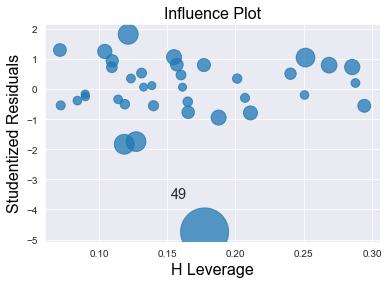

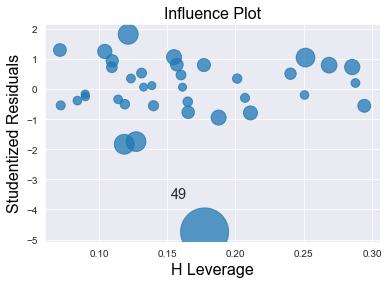

In [25]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [26]:
train_data1= train_data.drop(train_data.index[[4]], axis=0)

In [27]:
model2= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     98.46
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.11e-17
Time:                        12:01:28   Log-Likelihood:                -379.18
No. Observations:                  36   AIC:                             770.4
Df Residuals:                      30   BIC:                             779.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.565e+04   7521.715      6.068      0.000    3.03e+04     6.1e+04
RnD                0.8460      0.056     15.218      0.000       0.732       0.960
Administration    -0.1160      0.075     -1.553      0.131      -0.269       0.037
Marketing          0.0136      0.021      0.639      0.528      -0.030       0.057
California      1.417e+04   3317.965      4.269      0.000    7389.401    2.09e+04
Florida         1.642e+04   3675.345      4.467      0.000    8910.078    2.39e+04
NewYork         1.506e+04   3417.066      4.408      0.000    8084.779     2.2e+04
==============================================================================
Omnibus:                       15.297   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.088
Skew:                          -1.213   Prob(JB):                     7.16e-05
Kurtosis:                       5.615   Cond. No.                     2.88e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     93.90
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.30e-17
Time:                        12:01:53   Log-Likelihood:                -368.89
No. Observations:                  35   AIC:                             749.8
Df Residuals:                      29   BIC:                             759.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.614e+04   7636.963      6.042      0.000    3.05e+04    6.18e+04
RnD                0.8525      0.057     14.939      0.000       0.736       0.969
Administration    -0.1232      0.076     -1.615      0.117      -0.279       0.033
Marketing          0.0133      0.021      0.621      0.539      -0.031       0.057
California      1.474e+04   3468.877      4.248      0.000    7641.659    2.18e+04
Florida         1.637e+04   3713.091      4.408      0.000    8772.214     2.4e+04
NewYork         1.504e+04   3451.624      4.357      0.000    7978.602    2.21e+04
==============================================================================
Omnibus:                       15.957   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.389
Skew:                          -1.263   Prob(JB):                     3.74e-05
Kurtosis:                       5.756   Cond. No.                     3.18e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
rsq_rnd = smf.ols("RnD~Administration+Marketing+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

In [30]:
rsq_adm = smf.ols("Administration~RnD+Marketing+California+Florida+NewYork", data=train_data2).fit().rsquared
ViF_adm = 1/(1-rsq_adm)

In [31]:
rsq_mar = smf.ols("Marketing ~ RnD+Administration+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_mar = 1/(1-rsq_mar)

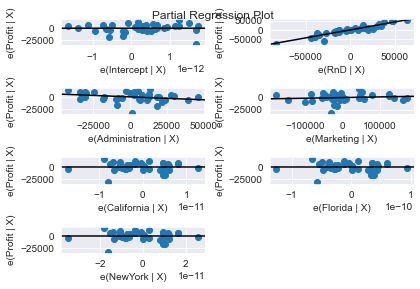

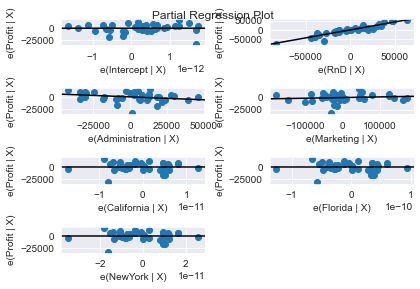

In [32]:
sm.graphics.plot_partregress_grid(model2)

In [33]:
model3= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.62e-17
Time:                        12:04:11   Log-Likelihood:                -370.40
No. Observations:                  35   AIC:                             750.8
Df Residuals:                      30   BIC:                             758.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.474e+04   2992.789     11.609      0.000    2.86e+04    4.09e+04
RnD            0.8081      0.051     15.739      0.000       0.703       0.913
Marketing      0.0280      0.020      1.404      0.171      -0.013       0.069
California  1.115e+04   2737.280      4.075      0.000    5564.326    1.67e+04
Florida     1.222e+04   2752.025      4.440      0.000    6598.606    1.78e+04
NewYork     1.137e+04   2667.701      4.262      0.000    5922.654    1.68e+04
==============================================================================
Omnibus:                       12.422   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.172
Skew:                          -1.093   Prob(JB):                      0.00138
Kurtosis:                       5.063   Cond. No.                     3.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
finalmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.62e-17
Time:                        12:04:40   Log-Likelihood:                -370.40
No. Observations:                  35   AIC:                             750.8
Df Residuals:                      30   BIC:                             758.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.474e+04   2992.789     11.609      0.000    2.86e+04    4.09e+04
RnD            0.8081      0.051     15.739      0.000       0.703       0.913
Marketing      0.0280      0.020      1.404      0.171      -0.013       0.069
California  1.115e+04   2737.280      4.075      0.000    5564.326    1.67e+04
Florida     1.222e+04   2752.025      4.440      0.000    6598.606    1.78e+04
NewYork     1.137e+04   2667.701      4.262      0.000    5922.654    1.68e+04
==============================================================================
Omnibus:                       12.422   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.172
Skew:                          -1.093   Prob(JB):                      0.00138
Kurtosis:                       5.063   Cond. No.                     3.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
train_pred = finalmodel.predict(train_data2)

In [36]:
train_res= train_data2["Profit"]-train_pred

In [37]:
train_rmse = np.sqrt(np.mean(train_res*train_res))

In [38]:
test_pred = finalmodel.predict(test_data)

In [39]:
test_res= test_data["Profit"]- test_pred

In [40]:
test_rmse = np.sqrt(np.mean(test_res*test_res))

In [41]:
startup1= startup.drop(startup.index[[4,24]],axis=0)
bestmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data =startup1).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.35e-27
Time:                        12:06:51   Log-Likelihood:                -505.22
No. Observations:                  48   AIC:                             1020.
Df Residuals:                      43   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2158.528     16.332      0.000    3.09e+04    3.96e+04
RnD            0.8017      0.044     18.327      0.000       0.713       0.890
Marketing      0.0290      0.017      1.750      0.087      -0.004       0.062
California  1.153e+04   1959.390      5.886      0.000    7581.153    1.55e+04
Florida     1.199e+04   2231.189      5.376      0.000    7495.179    1.65e+04
NewYork     1.172e+04   2091.061      5.607      0.000    7507.870    1.59e+04
==============================================================================
Omnibus:                       14.156   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.900
Skew:                          -0.965   Prob(JB):                     7.87e-05
Kurtosis:                       5.392   Cond. No.                     1.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
bestmodel_pred = bestmodel.predict(startup1)

Text(0, 0.5, 'Fitted values')

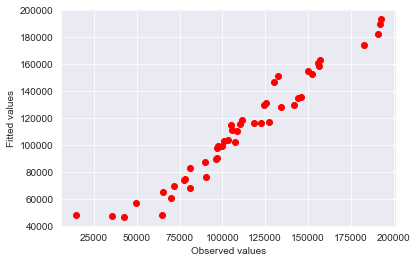

In [43]:
plt.scatter(startup1.Profit,bestmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

Text(0, 0.5, 'Residuals')

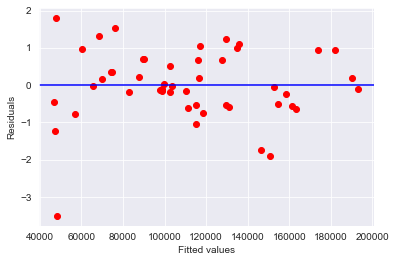

In [44]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson, c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([ 1.,  0.,  0.,  2.,  2., 10., 15.,  8.,  7.,  3.]),
 array([-3.50866306, -2.97830915, -2.44795525, -1.91760135, -1.38724745,
        -0.85689354, -0.32653964,  0.20381426,  0.73416816,  1.26452207,
         1.79487597]),
 <BarContainer object of 10 artists>)

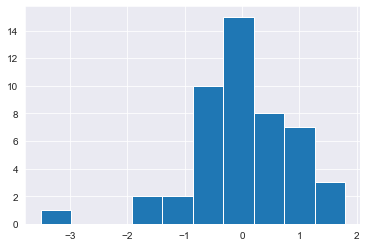

In [45]:
plt.hist(bestmodel.resid_pearson)

In [46]:
import pylab
import scipy.stats as st

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-3.50866306, -1.91417586, -1.72759685, -1.23268811, -1.05039156,
         -0.77854107, -0.75465648, -0.65273938, -0.6074688 , -0.59579298,
         -0.55969506, -0.53273591, -0.52478929, -0.49680024, -0.44370809,
         -0.23933784, -0.18459717, -0.17530937, -0.16016657, -

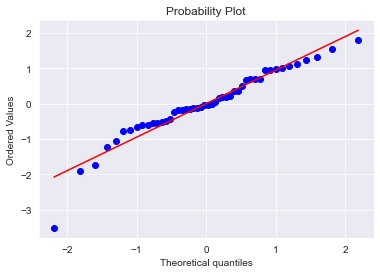

In [47]:
st.probplot(bestmodel.resid_pearson, dist='norm', plot=pylab)

Text(0, 0.5, 'Residuals')

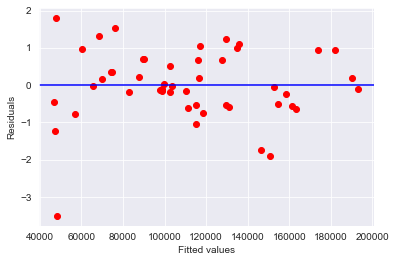

In [48]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")